In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

In [2]:
data = pd.read_csv("train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [4]:
x = data.drop("label", axis = 1)
y = data["label"]

In [5]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
xover, yover = oversample.fit_resample(x, y)
len(xover), len(yover)

(42889, 42889)

In [6]:
# DEFINING A FUNCTION TO PREPROCESS THE DATA
# CONVERTING THEM TO SHAPE(NUMBER,PIXEL,PIXEL)
def preprocess(x, y):
    digits = []
    labels = []
    for i in tqdm(range(0,len(x))):
        # TAKING ONE DIGIT OUT OF THE DATAFRAME
        digit = np.array(x.iloc[i:i+1,:])
        # RESHAPING TO MAKE AN IMAGE OF 28 X 28 PIXELS
        digit = digit.reshape(28,28)
        # EXTRACTING THE LABELS 
        label = y[i]
        
        digits.append(digit)
        labels.append(label)

    # MAKING AN ARRAY OF DATA
    digits = np.array(digits)
    labels = np.array(labels)
    return digits,labels


In [7]:
digits,labels = preprocess(xover, yover)

100%|██████████| 42889/42889 [06:41<00:00, 106.83it/s]


In [8]:
digits.shape, labels.shape

((42889, 28, 28), (42889,))

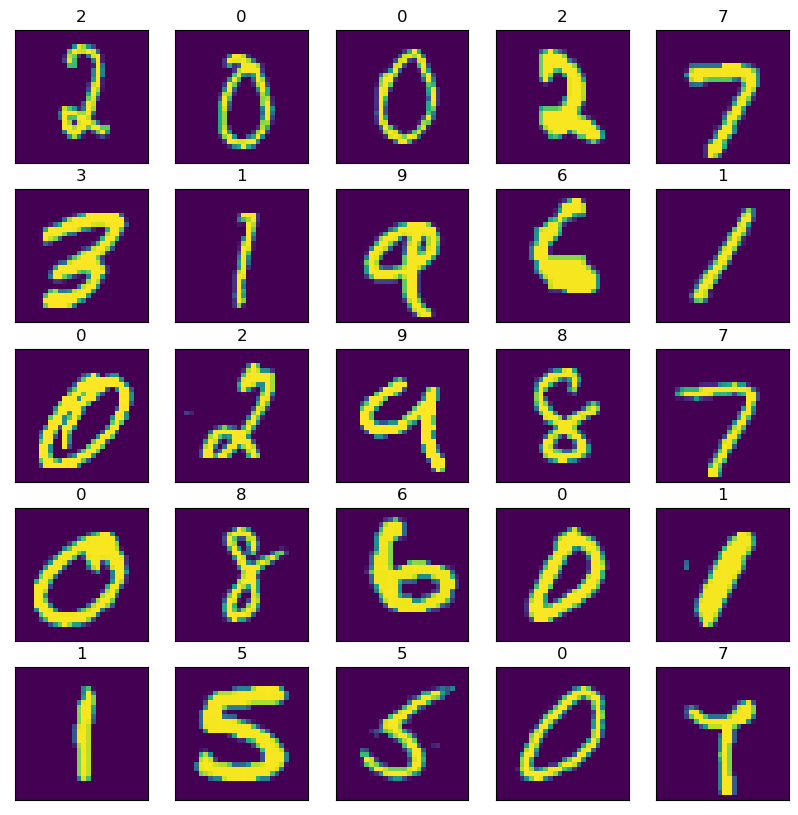

In [9]:
# SEEING OUR AUGMENTED DATA
import random
fig,ax = plt.subplots(5,5,figsize=(10,10))
for i in range(0,5):
    for j in range(0,5):
        n = random.randint(0,len(digits))
        ax[i][j].imshow(digits[n])
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].set_title(f"{labels[n]}")

In [10]:
from keras import layers

def cnn_mnist_model():
    cnn_mnist_model = tf.keras.Sequential(
        [
            layers.InputLayer(input_shape=(28, 28, 1)),
            # BLOCK 1
            layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="valid", use_bias=False, kernel_initializer="he_normal"),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="valid", use_bias=False, kernel_initializer="he_normal"),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
            layers.BatchNormalization(),
            layers.Dropout(0.4),
            # BLOCK 2
            layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="valid", use_bias=False, kernel_initializer="he_normal",),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="valid", use_bias=False, kernel_initializer="he_normal",),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
            layers.BatchNormalization(),
            layers.Dropout(0.4),
            #
            layers.Flatten(),
            layers.Dense(128, use_bias=False, kernel_initializer="he_normal"),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.Dropout(0.5),
            layers.Dense(10, activation="softmax"),
        ]
    )

    cnn_mnist_model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="nadam",
        metrics=["accuracy"],
    )
    return cnn_mnist_model

cnn_mnist_model = cnn_mnist_model()

In [12]:
ypreds = cnn_mnist_model.predict(digits[:20000])
# TAKING MAXIMUM PROBABILITIES TO MAKE OUR PREDICTIONS
preds=[]
for i in range(0,len(ypreds)):
    preds.append(np.argmax(ypreds[i]))

# MAKING A DATAFRAME TO ACCES TRUE LABELS AND PREDICTED LABELS WITH EASE
df = pd.DataFrame({"TRUE":labels[:20000],"PREDS":preds})
df


625/625 [==============================] - 2s 3ms/step


,TRUE,PREDS
0,1,1
1,0,0
2,1,1
3,4,4
4,0,0
...,...,...
19995,9,9
19996,9,9
19997,6,6
19998,8,8


In [13]:
from sklearn.metrics import classification_report
rep = pd.DataFrame(classification_report(df["TRUE"],df["PREDS"],output_dict=True))
rep

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.999482,0.999558,1.000000,1.000000,0.998984,0.999442,0.999495,0.997110,0.997916,0.998486,0.99905,0.999047,0.999051
recall,0.999482,0.998676,0.999005,0.999038,0.997463,0.998885,0.998486,1.000000,1.000000,0.999495,0.99905,0.999053,0.999050
f1-score,0.999482,0.999117,0.999502,0.999519,0.998223,0.999164,0.998990,0.998553,0.998957,0.998990,0.99905,0.999050,0.999050
support,1932.000000,2266.000000,2010.000000,2080.000000,1971.000000,1794.000000,1982.000000,2070.000000,1915.000000,1980.000000,0.99905,20000.000000,20000.000000


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df["TRUE"],df["PREDS"])
cm

array([[1931,    0,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0, 2263,    0,    0,    0,    0,    0,    3,    0,    0],
       [   0,    0, 2008,    0,    0,    0,    0,    2,    0,    0],
       [   0,    0,    0, 2078,    0,    0,    0,    0,    2,    0],
       [   0,    1,    0,    0, 1966,    0,    0,    1,    0,    3],
       [   0,    0,    0,    0,    0, 1792,    1,    0,    1,    0],
       [   1,    0,    0,    0,    1,    1, 1979,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2070,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1915,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0,    0, 1979]])

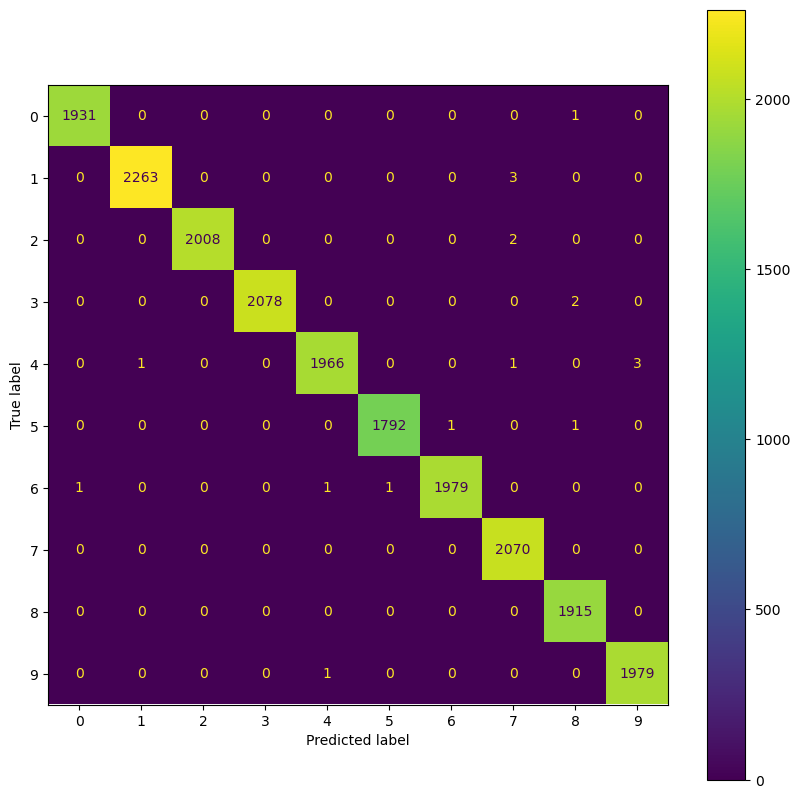

In [15]:
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

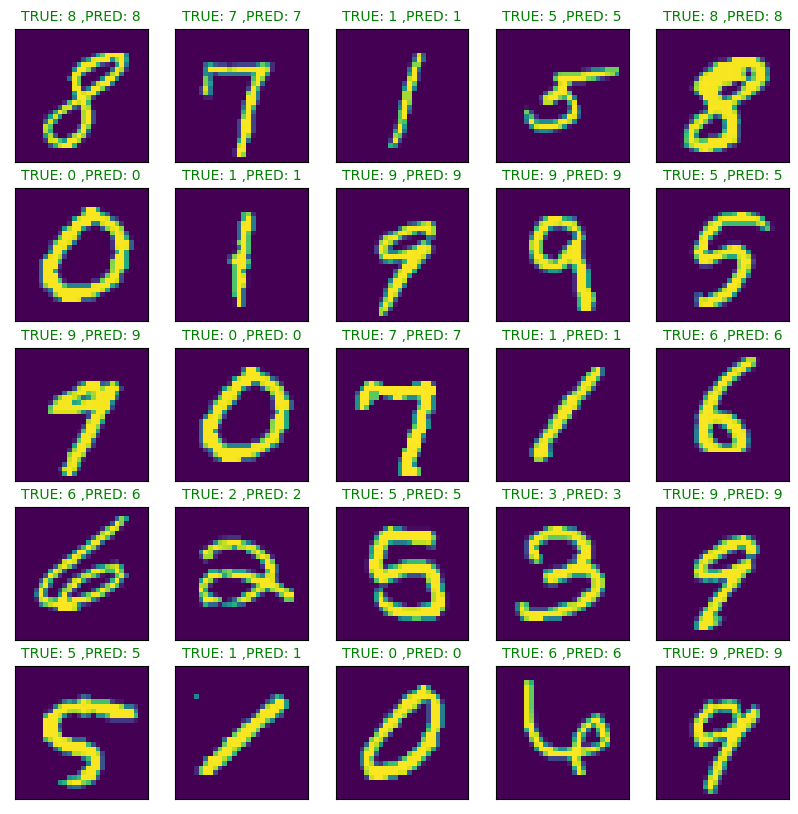

In [16]:
fig,ax = plt.subplots(5,5,figsize=(10,10))
for i in range(0,5):
    for j in range(0,5):
        n = random.randint(0,100)
        ax[i][j].imshow(digits[:20000][n])
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        if labels[:20000][n] != preds[n]:
            ax[i][j].set_title(f"TRUE: {labels[:20000][n]} ,PRED: {preds[n]}",color = "red",fontsize = 10)
        else:
            ax[i][j].set_title(f"TRUE: {labels[:20000][n]} ,PRED: {preds[n]}",color = "green",fontsize = 10)

In [17]:
test_df = pd.read_csv("test.csv")
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
def preprocess_test(df):
    digits = []
    for i in tqdm(range(0,len(df))):
        digit = np.array(df.iloc[i:i+1,:])
        digit = digit.reshape(28,28)
        digits.append(digit)

    digits = np.array(digits)
    return digits

test_digits = preprocess_test(test_df)

100%|██████████| 28000/28000 [00:01<00:00, 14139.99it/s]


In [19]:
test_digits.shape

(28000, 28, 28)

In [20]:
ypreds_test = cnn_mnist_model.predict(test_digits)
test_preds=[]
for i in tqdm(range(0,len(ypreds_test))):
    test_preds.append(np.argmax(ypreds_test[i]))
    
pred_df = pd.DataFrame({"ImageId":test_df.index+1, "Label":test_preds})
pred_df

875/875 [==============================] - 2s 3ms/step


100%|██████████| 28000/28000 [00:00<00:00, 258870.56it/s]


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [21]:
pred_df.to_csv("submission.csv", index = False)